In [1]:
import os

if not os.getcwd().endswith('mob2crime'):
    os.chdir('..')
os.getcwd()

'/mnt/c/1Res/mob2crime'

In [2]:
import glob
import datetime

import pandas as pd

from collections import defaultdict

In [3]:

tower_info_version = '08'
stat_dir = 'stats/MexTw%sHrUniqCntVOZ/' % tower_info_version

In [4]:

fns = []
for fn in glob.glob(stat_dir+'*-located.csv'):
    fns.append(fn)
fns = sorted(fns)

In [10]:
store_wd = defaultdict(list)
store_wk = defaultdict(list)
store = {True: store_wd, False:store_wk}
for i,fn in enumerate(fns):
    if i%30==0:
        print('working on %dth file %s' % (i, fn))
    date = os.path.basename(fn)[:10]
#     if date=='2009-10-03': break
    date = datetime.datetime.strptime(date,'%Y-%m-%d')
    is_wd = date.weekday()<5
    tmp_df = pd.read_csv(fn,index_col=0)
    for gtid, row in tmp_df.iterrows():
        store[is_wd][gtid].append(row)
#     break

working on 0th file stats/MexTw08HrUniqCntVOZ/2009-10-01-located.csv
working on 30th file stats/MexTw08HrUniqCntVOZ/2009-10-31-located.csv
working on 60th file stats/MexTw08HrUniqCntVOZ/2009-11-30-located.csv
working on 90th file stats/MexTw08HrUniqCntVOZ/2009-12-30-located.csv
working on 120th file stats/MexTw08HrUniqCntVOZ/2010-01-29-located.csv
working on 150th file stats/MexTw08HrUniqCntVOZ/2010-03-27-located.csv
working on 180th file stats/MexTw08HrUniqCntVOZ/2010-04-26-located.csv
working on 210th file stats/MexTw08HrUniqCntVOZ/2010-05-26-located.csv
working on 240th file stats/MexTw08HrUniqCntVOZ/2010-06-25-located.csv


In [7]:
store_wd.__len__()

5353

In [11]:
average = {True: dict(), False: dict()}
for is_wd in [True, False]:
    for gtid, rows in store[is_wd].items():
        avg_row = pd.DataFrame(rows).fillna(0).mean(axis=0)
        average[is_wd][gtid]=avg_row
#         break

In [18]:
for is_wd in [True, False]:
    for gtid, row in average[is_wd].items():
        assert(len(row)==24)
'yes'

'yes'

In [20]:
from sklearn.cluster import KMeans

In [27]:
tw_avg_wd = pd.DataFrame(average[True]).T
tw_avg_wk = pd.DataFrame(average[False]).T

In [36]:
%matplotlib inline

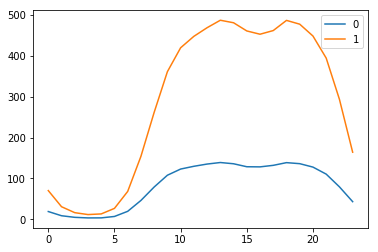

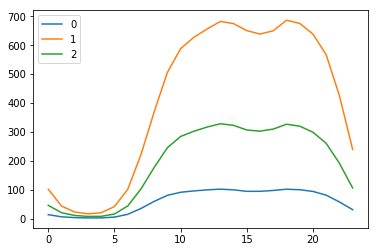

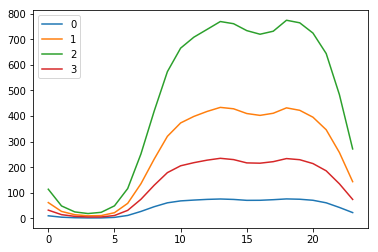

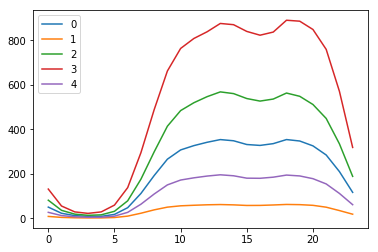

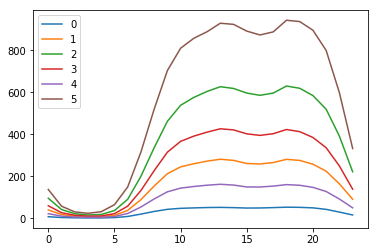

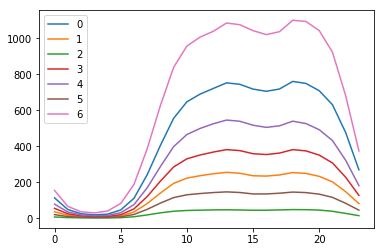

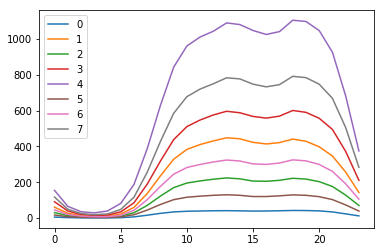

In [42]:
for n in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n).fit(tw_avg_wd.values)
    pd.DataFrame(kmeans.cluster_centers_).T.plot()

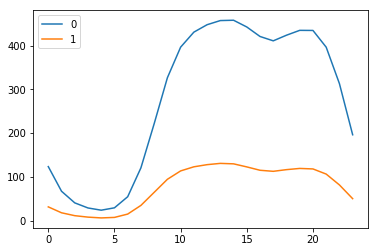

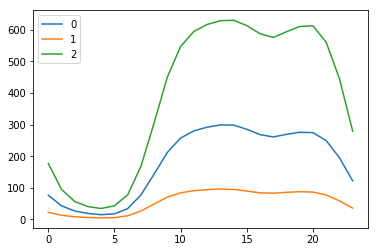

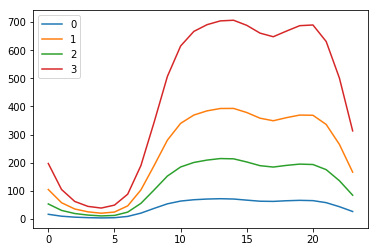

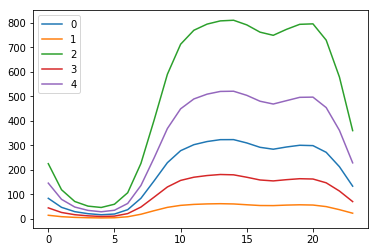

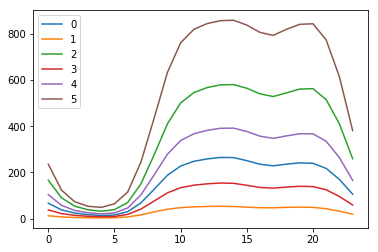

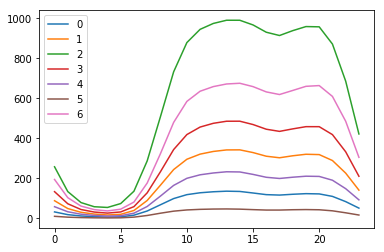

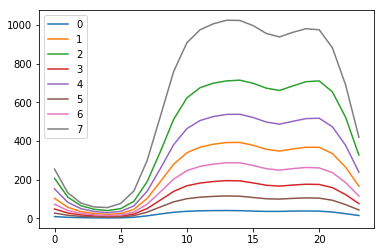

In [43]:
for n in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n).fit(tw_avg_wk.values)
    pd.DataFrame(kmeans.cluster_centers_).T.plot()